In [1]:
from PIL import Image, ImageDraw, ImageFont
import io
import math

In [4]:
def build_image_bytes(num_bytes, camera, frame_number):
    width = math.ceil(math.sqrt(num_bytes / 3))
    height = width
    font_size = int(min(width, height) * 0.15)
    img = Image.new('RGB', (width, height), (25, 25, 240, 0))
    font = ImageFont.truetype('FreeSans.ttf', font_size)
    draw = ImageDraw.Draw(img)
    draw.text((width//10, height//10), 'FRAME\n%05d\nCAMERA\n %03d' % (frame_number, camera), font=font, align='center')
    out_bytesio = io.BytesIO()
    img.save(out_bytesio, format='PNG', compress_level=0)
    out_bytes = out_bytesio.getvalue()
    return out_bytes

In [8]:
in_png_bytes = build_image_bytes(20*1024, 0, 0)

In [9]:
in_pil = Image.open(io.BytesIO(in_png_bytes))

In [13]:
in_pil.mode, in_pil.size

('RGB', (83, 83))

In [11]:
out_raw_bytes = in_pil.tobytes()

In [14]:
out_pil = Image.frombytes(in_pil.mode, in_pil.size, out_raw_bytes)

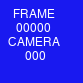

In [15]:
out_pil